# Stat 306 Project Group B7: Predicting adult income

In [ ]:
set.seed(2004)

# Table of Contents
- [Introduction](#Introduction)
- [EDA](#EDA)
- [Data cleaning](#Data_cleaning)
- [Evaluation and model selection](#Evaluation,model_selection)
- [Conclusion](#Conclusion)

In [3]:
library(tidyverse)
library(repr)
library(dplyr)
library(ggplot2)
library(tidyr)
library(tidymodels)
library(caret)
library(e1071)
library(part)
library(rpart.plot)
library(rpart)
library(car)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ rsample      1.2.1 
✔ dials        1.2.1      ✔ tune         1.2.0 
✔ infer        1.0.7      ✔ workflows    1.1.4 
✔ modeldata    1.3.0      ✔ workflowsets 1.1.0 
✔ parsnip      1.2.1      ✔ yardstick    1.3.1 
✔ recipes      1.0.10     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ 

# Introduction

In this study, we utilize the UCI Adult Census Salary dataset, which gathers demographic and employment-related information from the 1994 U.S. census.

The dataset comprises 15 variables, encompassing both numerical and categorical types, to capture a comprehensive snapshot of the American workforce during that time. The numerical variables include age, final weight (fnlwgt) representing the number of people in the U.S. someone symbolizes, education-num reflecting the total years of education, capital-gain and capital-loss indicating financial earnings or losses from investments outside of work, and hours-per-week detailing work hours. Categorical variables encompass workclass, education, marital status, occupation, relationship, race, sex, native country, and salary, with the latter serving as the prediction target to determine if an individual's annual income exceeds $50,000.

The motivation behind analyzing this dataset stems from a desire to understand the critical factors influencing income levels and to identify potential biases in income distribution across different demographic groups, such as gender and race. Additionally, this analysis aims to detect workforce trends, such as variations in education level distributions across different occupations. By employing different techniques and algorithms in data science, this project seeks to predict whether an individual will earn more than $50,000 per year based on their attributes within the dataset. This investigation not only contributes to a deeper understanding of the economic and social dynamics of the 1990s American workforce but also enhances our knowledge of applying data science methodologies in real-world socioeconomic research.


In [4]:
# Read the adult.data file
# The `adult.names` file typically contains information on the attributes and you need to specify them manually
column_names = c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", 
                 "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", 
                 "income")

adult_data <- read.csv("~/Downloads/adult (1)/adult.data", header = FALSE, sep = ",", col.names = column_names, na.strings = " ?")

# Check the first few rows of the data
head(adult_data)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Numerical Variables:

- age: How old someone is. (Years)
- fnlwgt: A number showing how many people in the U.S. someone represents. (People)
- education-num: The total number of years someone went to school. (Years)
- capital-gain: Money made from investments beyond work. (Dollars, USD)
- capital-loss: Money lost from investments beyond work. (Dollars, USD)
- hours-per-week: The number of hours someone works each week. (Hours)

Categorical Variables:

- workclass: Type of employment, like government or self-employed.
- education: Highest level of school completed, such as high school or bachelor's degree.
- marital-status: Whether someone is married, single, divorced, etc.
- occupation: The kind of job someone has, like teacher or engineer.
- relationship: A person's role in their family, such as parent or spouse.
- race: Group identity based on physical characteristics.
- sex: Gender, male or female.
- native-country: The country where someone was born.
- salary: If someone's income is more or less than $50,000 annually. This is the target for prediction.


In [5]:
nrow(adult_data)

[1] 32561

# EDA


### Figure1. Age vs number of people who receive income > 50k by different sex group


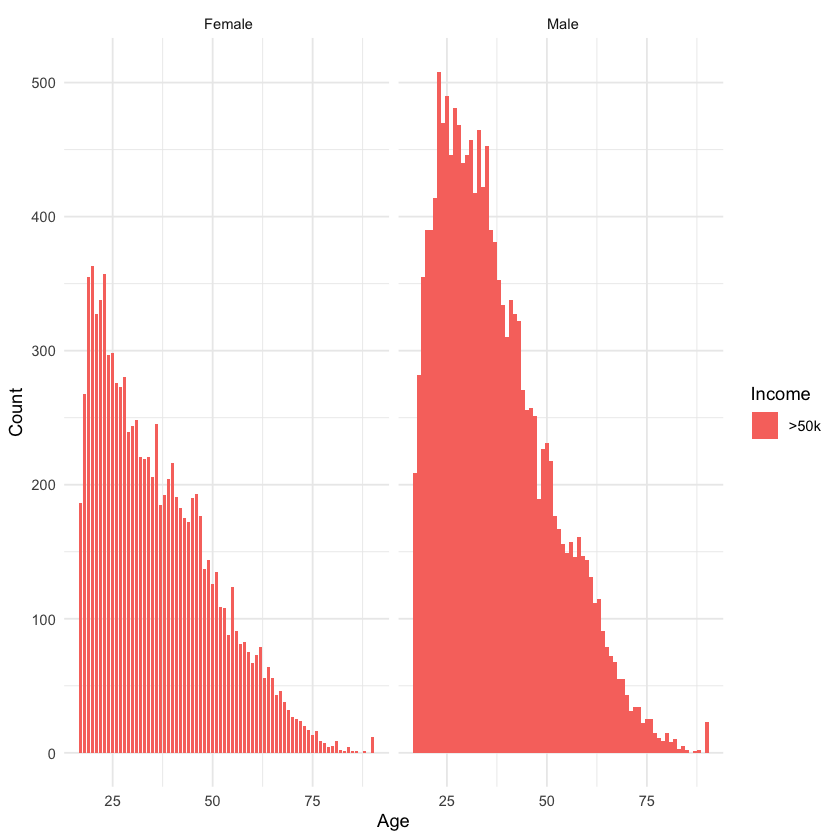

In [6]:
summary_data <- adult_data %>%
    group_by(age, sex, income) %>%
    summarise(count = n(), .groups = 'drop') %>%
    mutate(income = ifelse(income == 0, "<=50k", ">50k"))

ggplot(summary_data, aes(x = age, y = count, fill = income)) +
    geom_bar(stat = "identity", position = "dodge") +
    facet_grid(. ~ sex) +
    labs(x = "Age", y = "Count", fill = "Income") +
    theme_minimal()


In [7]:
head(summary_data)

age,sex,income,count
<int>,<chr>,<chr>,<int>
17,Female,>50k,186
17,Male,>50k,209
18,Female,>50k,268
18,Male,>50k,282
19,Female,>50k,355
19,Female,>50k,1


### Figure2. Education vs number of people who receive income > 50k

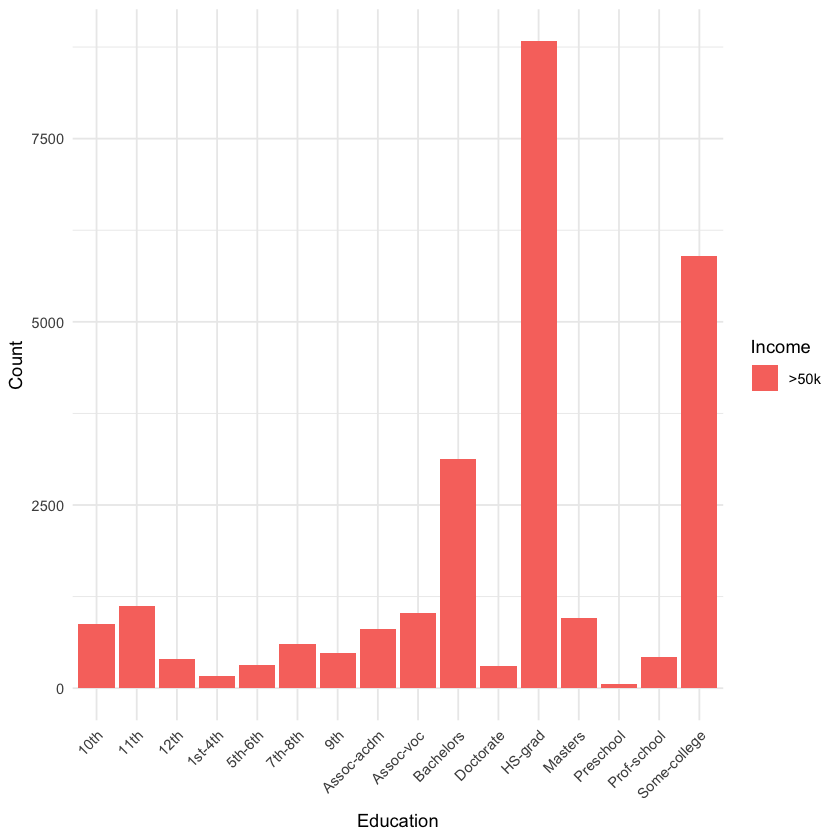

In [8]:
summary_data <- adult_data %>%
    group_by(education, income) %>%
    summarise(count = n(), .groups = 'drop') %>%
    mutate(income = ifelse(income == 0, "<=50k", ">50k"))
ggplot(summary_data, aes(x = education, y = count, fill = income)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "Education", y = "Count", fill = "Income") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Combine theme settings


### Figure 3: Race vs Number of People Colored by Income of Different Sex Groups

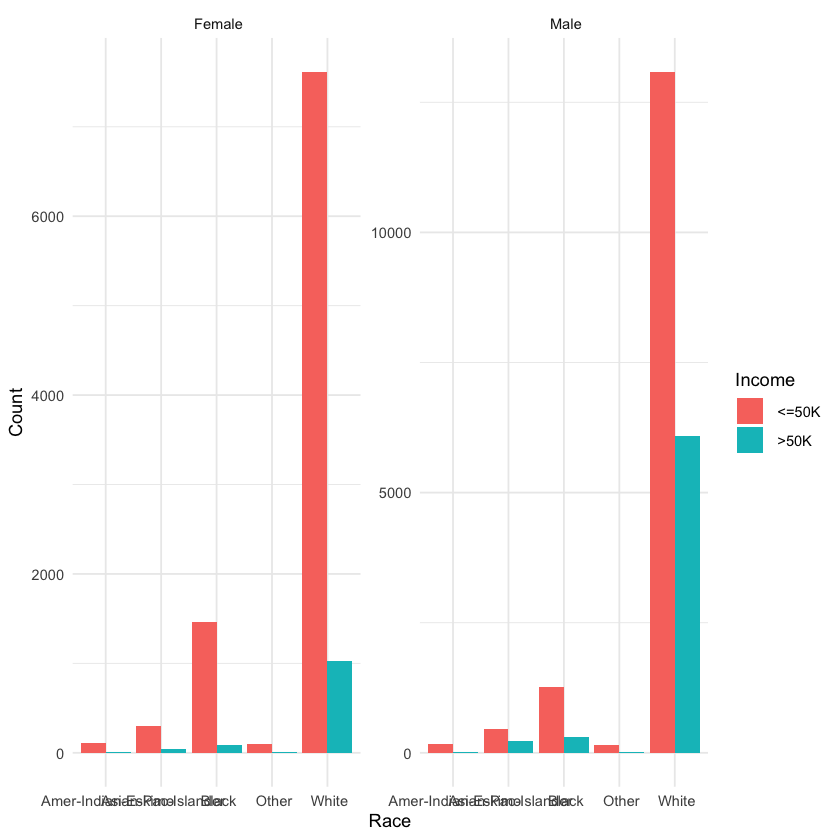

In [9]:
summary_data <- adult_data %>%
  group_by(race, sex, income) %>%
  summarise(count = n(), .groups = 'drop') # Drop the grouping

# Plotting the data
ggplot(summary_data, aes(x = race, y = count, fill = income)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~sex, scales = "free") +
  labs(x = "Race", y = "Count", fill = "Income") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme_minimal()

### Figure 4: Sex vs Number of People Represented (fnlwgt) Colored by Income


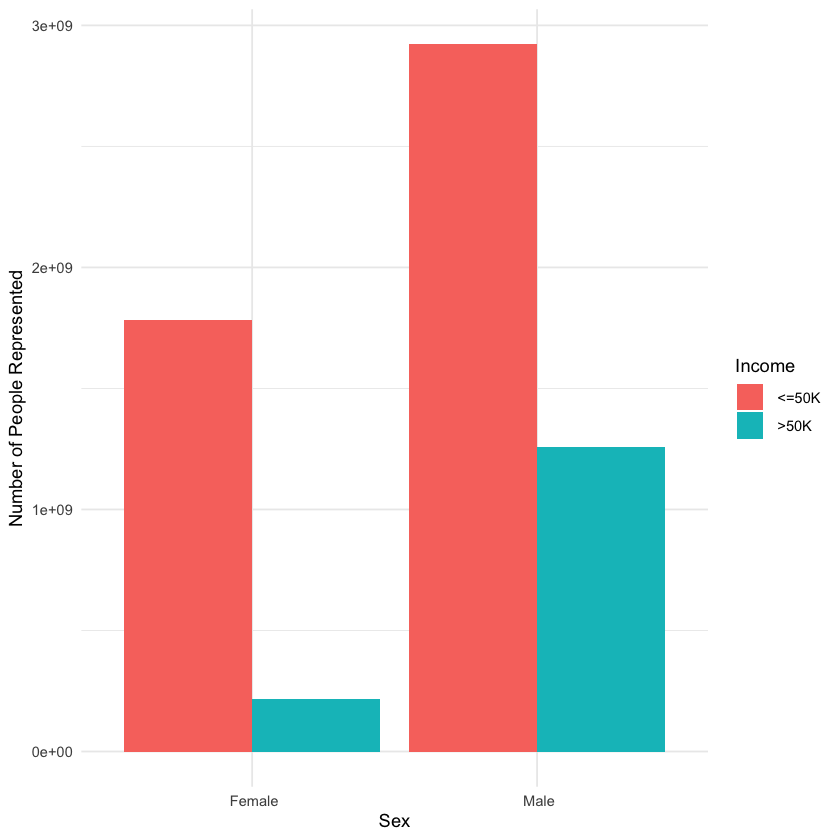

In [10]:
fnlwgt_data <- adult_data %>%
  group_by(sex, income) %>%
  summarise(total_fnlwgt = sum(fnlwgt), .groups = 'drop') # Sum fnlwgt and drop the grouping

# Plotting the data
ggplot(fnlwgt_data, aes(x = sex, y = total_fnlwgt, fill = income)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "Sex", y = "Number of People Represented", fill = "Income") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme_minimal()

### Figure 5: Education number vs Count of each income class Colored by Income

`summarise()` has grouped output by 'education_num'. You can override using the
`.groups` argument.


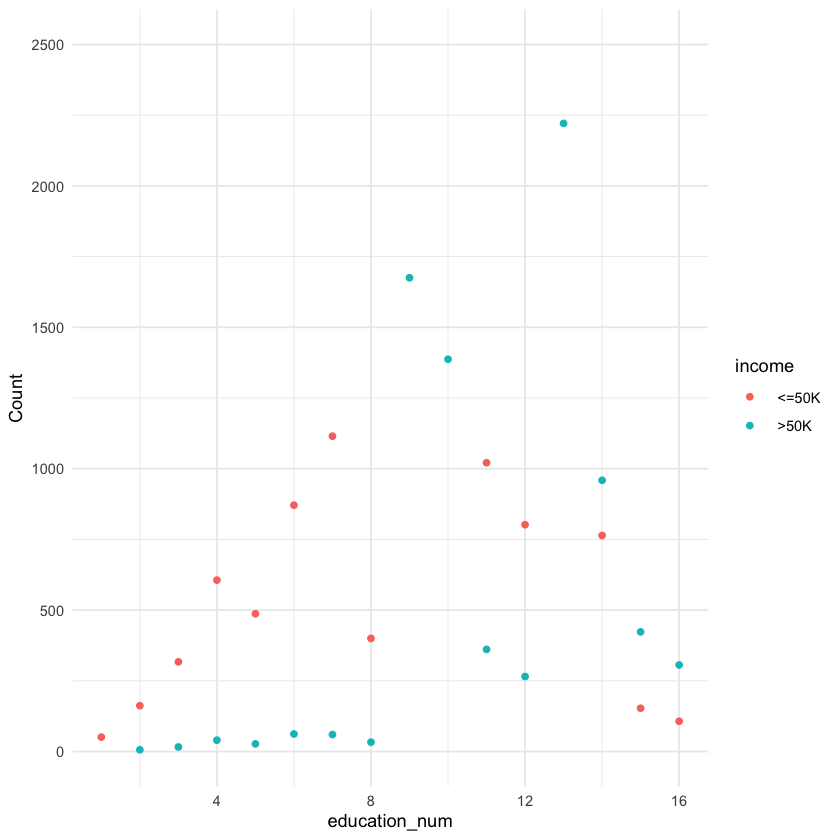

In [11]:
summary_data <-adult_data%>%group_by(education_num,income) %>%summarise(count = n())
ggplot(summary_data, aes(x=education_num, y = count, color =income)) +geom_point()+labs(x = "education_num", y = "Count", color = "income")+theme_minimal()+coord_cartesian(ylim = c(0, 2500))

# Data_cleaning

### summary stat

In [12]:
# Displaying the structure of the dataset
str(adult_data)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : chr  " State-gov" " Self-emp-not-inc" " Private" " Private" ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : chr  " Bachelors" " Bachelors" " HS-grad" " 11th" ...
 $ education_num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital_status: chr  " Never-married" " Married-civ-spouse" " Divorced" " Married-civ-spouse" ...
 $ occupation    : chr  " Adm-clerical" " Exec-managerial" " Handlers-cleaners" " Handlers-cleaners" ...
 $ relationship  : chr  " Not-in-family" " Husband" " Not-in-family" " Husband" ...
 $ race          : chr  " White" " White" " White" " Black" ...
 $ sex           : chr  " Male" " Male" " Male" " Male" ...
 $ capital_gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours_per_week: int  40 13 40 40 40 40 16 45 50 40 ...
 $ native_countr

In [13]:
summary(adult_data)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 education_num   marital_status      occupation        relationship      
 Min.   : 1.00   Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

### remove missing values by replacing with mode

In [14]:
# Counting missing values for each column
missing_values_per_column <- sapply(adult_data, function(x) sum(is.na(x)))
print(missing_values_per_column)


           age      workclass         fnlwgt      education  education_num 
             0           1836              0              0              0 
marital_status     occupation   relationship           race            sex 
             0           1843              0              0              0 
  capital_gain   capital_loss hours_per_week native_country         income 
             0              0              0            583              0 


In [15]:
# For the 'workclass' and 'occupation' categorical variables, you can replace missing values with the mode.
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Replace NA with the most common value (mode)
adult_data$workclass[is.na(adult_data$workclass)] <- getmode(adult_data$workclass)
adult_data$occupation[is.na(adult_data$occupation)] <- getmode(adult_data$occupation)
adult_data$native_country[is.na(adult_data$native_country)] <- getmode(adult_data$native_country)


In [16]:
# Assuming df is your dataframe
numeric_columns <- sapply(adult_data, is.numeric)

# Applying scale function to only numeric columns
adult_data[numeric_columns] <- lapply(adult_data[numeric_columns], scale)



In [17]:
# Check the mean and standard deviation of the numeric columns
sapply(adult_data[numeric_columns], mean)  # Should be very close to 0
sapply(adult_data[numeric_columns], sd)    # Should be close to 1


age         fnlwgt  education_num   capital_gain   capital_loss 
 -4.922883e-17  -1.181928e-16  -9.225547e-17  -1.093754e-15   6.757457e-16 
hours_per_week 
 -5.803793e-16

age         fnlwgt  education_num   capital_gain   capital_loss 
             1              1              1              1              1 
hours_per_week 
             1

### transforming the response var to 0 and 1

In [18]:
# Trim leading and trailing whitespace
adult_data$income <- trimws(adult_data$income)

# Transformation so response is 0 or 1
adult_data$income <- ifelse(adult_data$income == ">50K", 1, 0)

# Check the changes
table(adult_data$income)



    0     1 
24720  7841 

### spliting the dataset

In [19]:
set.seed(123) # Setting a seed for reproducibility

# Assuming 'data' is your dataframe
sample_size <- floor(0.75 * nrow(adult_data)) # Size of the training set: 75% of the data

# Creating a random sample of row indices for the training set
train_indices <- sample(seq_len(nrow(adult_data)), size = sample_size)

# Splitting the data into training and testing sets
train_set <- adult_data[train_indices, ]
test_set <- adult_data[-train_indices, ]


In [20]:
head(train_set,20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,"<dbl[,1]>",<chr>,"<dbl[,1]>",<chr>,"<dbl[,1]>",<chr>,<chr>,<chr>,<chr>,<chr>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<chr>,<dbl>
18847,-0.40919866,Private,-0.83039683,Some-college,-0.03135955,Never-married,Prof-specialty,Own-child,White,Male,-0.1459182,-0.2166562,-0.0354289,United-States,0
18895,-0.92237887,Private,-0.55753083,HS-grad,-0.42005317,Never-married,Adm-clerical,Own-child,Black,Female,-0.1459182,-0.2166562,-0.0354289,United-States,0
26803,0.10398154,Private,0.41072139,7th-8th,-2.36352131,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.1459182,-0.2166562,-0.0354289,El-Salvador,0
25102,-0.18926429,Self-emp-inc,-0.78219217,Some-college,-0.03135955,Divorced,Sales,Unmarried,Asian-Pac-Islander,Male,-0.1459182,-0.2166562,1.1793989,United-States,0
28867,0.32391592,State-gov,-1.52844529,Bachelors,1.13472134,Married-civ-spouse,Prof-specialty,Husband,White,Male,-0.1459182,-0.2166562,-0.2783945,United-States,1
2986,-1.14231324,Private,-0.26594384,Bachelors,1.13472134,Never-married,Other-service,Own-child,White,Female,-0.1459182,-0.2166562,-0.8453141,United-States,0
1842,-0.33588720,Local-gov,-1.20620932,Some-college,-0.03135955,Married-civ-spouse,Transport-moving,Husband,White,Male,-0.1459182,3.7018448,-0.0354289,United-States,0
25718,-0.33588720,Self-emp-not-inc,0.61132778,HS-grad,-0.42005317,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.4644842,-0.2166562,4.0139972,United-States,0
3371,-0.04264137,Private,1.50602243,Prof-school,1.91210860,Married-civ-spouse,Prof-specialty,Husband,White,Male,-0.1459182,-0.2166562,1.5843415,United-States,0


In [21]:
train_set$income <- as.factor(train_set$income)
test_set$income <- as.factor(test_set$income)


# MODEL_TRAINING

- In this analysis, we've chosen three distinct models: Logistic Regression, K-Nearest Neighbors (KNN), and Decision Trees, each offering unique advantages for binary classification tasks. Logistic Regression is selected for its interpretability and effectiveness in estimating probabilities, making it an excellent baseline for binary outcomes. It shines in scenarios where relationships between the independent variables and the log odds of the outcomes are linear. KNN is included for its simplicity and non-parametric nature, allowing it to adapt flexibly to the data without assuming a specific functional form. It's particularly useful for capturing complex relationships through its proximity-based decision-making process. Decision Trees are chosen for their intuitive understanding and ability to capture non-linear relationships between features and the target variable, offering clear visualizations of decision paths.
- Each model is fitted using the respective best practices for parameter selection and evaluation. For Logistic Regression, we utilize backward selection to identify the most significant predictors, reducing model complexity and focusing on the most impactful features. KNN's performance heavily relies on the choice of 'k', the number of neighbors considered for making predictions; we use cross-validation to find the optimal 'k' value that balances bias and variance. For Decision Trees, we tune the complexity parameter to prevent overfitting, ensuring the model captures essential patterns without being overly specific to the training data.


### Logistic regression

In [22]:
# fit model using glm
log_model <- glm(income ~ ., data = train_set, family = binomial)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


### feature selection


In the pursuit of a finely-tuned logistic regression model, we've employed backward selection while being guided by a suite of statistical measures. These measures help us determine the appropriate complexity of our model, ensuring we capture the necessary details of the data without succumbing to overfitting.

In [25]:
library(leaps)
model<-regsubsets(income ~ ., data=train_set ,method='backward')
summary(model)
reg_summary=summary(model)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


Reordering variables and trying again:


Subset selection object
Call: regsubsets.formula(income ~ ., data = train_set, method = "backward")
97 Variables  (and intercept)
                                          Forced in Forced out
age                                           FALSE      FALSE
workclass Local-gov                           FALSE      FALSE
workclass Never-worked                        FALSE      FALSE
workclass Private                             FALSE      FALSE
workclass Self-emp-inc                        FALSE      FALSE
workclass Self-emp-not-inc                    FALSE      FALSE
workclass State-gov                           FALSE      FALSE
workclass Without-pay                         FALSE      FALSE
fnlwgt                                        FALSE      FALSE
education 11th                                FALSE      FALSE
education 12th                                FALSE      FALSE
education 1st-4th                             FALSE      FALSE
education 5th-6th                             FALSE

In [26]:
reg_summary$rsq
reg_summary$adjr2
reg_summary$cp
reg_summary$bic


[1] 0.05231239 0.11552587 0.17787053 0.21376846 0.23758115 0.26174137 0.28122381
[8] 0.29479365 0.30798158

[1] 0.05227358 0.11545342 0.17776952 0.21363965 0.23742501 0.26155993 0.28101771
[8] 0.29456254 0.30772643

[1] 11842.336  9425.801  7042.507  5671.060  4761.991  3839.626  3096.232
[8]  2579.052  2076.485

[1] -1291.889 -2967.539 -4742.425 -5822.591 -6563.531 -7339.797 -7982.787
[8] -8438.119 -8889.013

NULL

- In our backward selection procedure, we have meticulously examined each model ranging from 1 to 9 variables based on the Bayesian Information Criterion (BIC). The BIC values serve as a rigorous metric to evaluate the relative goodness of fit of the models while penalizing excessive complexity. The model with 9 variables emerged as the most optimal, achieving the lowest BIC value of -8889.01319061797. This suggests that including 9 variables strikes an appropriate balance by providing sufficient explanatory power without incurring unnecessary complexity. The backward selection process inherently considers the trade-off between model fit and complexity, thereby guiding us toward a model that not only fits the current data well but also holds promise for robust predictive performance on new, unseen data. Consequently, the 9-variable model is our preferred choice to proceed with, standing out as the model that adeptly navigates the balance between simplicity and the ability to capture the underlying structure of the data.
- Taking all these statistics into account, the model with nine variables stands out. It reaches the lowest BIC, the highest adjusted R-squared, and the lowest Cp, which is particularly noteworthy as it implies that the model has the right number of predictors. The ninth model's Cp value is considerably lower than the other models, aligning well with the heuristic that a Cp close to the number of predictors plus one suggests a well-fitting model. Thus, this convergence of statistical indicators robustly points to the nine-variable model as the optimal choice. It promises not just to explain the training data well, but also to generalize effectively to new data, providing a strong foundation for reliable predictions.







In [27]:
# Assuming 'model' is your regsubsets object from the backward selection
reg_summary <- summary(model)

# Loop through each model size

cat("Model with 9 variables:\n")

# Extract coefficients for model with 'i' variables
coeffs <- coef(model, id = i)

print(coeffs)
cat("\n")



Model with 1 variables:
           (Intercept) relationship Unmarried 
             1.2594422             -0.2006186 

Model with 2 variables:
                (Intercept) relationship Other-relative 
                  1.2669063                  -0.2254698 
     relationship Unmarried 
                 -0.2080827 

Model with 3 variables:
                (Intercept) relationship Other-relative 
                  1.2545819                  -0.2131454 
     relationship Unmarried           relationship Wife 
                 -0.1957583                   0.2216086 

Model with 4 variables:
                (Intercept) relationship Other-relative 
                 1.25405642                 -0.20679009 
     relationship Unmarried           relationship Wife 
                -0.18849726                  0.21900971 
               capital_loss 
                 0.05945897 

Model with 5 variables:
                (Intercept)         education Bachelors 
                 1.22074849            

Here we can see the detailed coefficients for the model we chose.

### KNN

In [28]:
control <- trainControl(method = "cv", number = 10)
knn_model <- train(income~., data = train_set, method = "knn", trControl = control, preProcess = c("center", "scale"))


Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: native_country Holand-Netherlands”
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: native_country Holand-Netherlands”
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: native_country Holand-Netherlands”


In [29]:
summary(knn_model)

            Length Class      Mode     
learn        2     -none-     list     
k            1     -none-     numeric  
theDots      0     -none-     list     
xNames      97     -none-     character
problemType  1     -none-     character
tuneValue    1     data.frame list     
obsLevels    2     -none-     character
param        0     -none-     list     

In [30]:
control <- trainControl(method = "cv", number = 10)
tuneGrid <- expand.grid(k = 1:10)

knn_model <- train(income ~ ., data = train_set, method = "knn", trControl = control, tuneGrid = tuneGrid)

In [31]:
# Find the best k for the knn model
knn_model$bestTune

,k
,<int>
9,9


### Decision tree

In [36]:
tree_model <- rpart(income ~ ., data = train_set, method = "class")

#rpart.plot(tree_model, box.palette = "RdBu", shadow.col = "gray", nn = TRUE)


In [37]:
control <- trainControl(method = "cv", number = 10)
tuneGrid <- expand.grid(cp = seq(0.01, 0.1, by = 0.01))

tree_model <- train(income ~ ., data = train_set, method = "rpart", trControl = control, tuneGrid = tuneGrid)

In [38]:
tree_model$bestTune

,cp
,<dbl>
1,0.01


In [40]:
best_cp <- tree_model$bestTune$cp

In [42]:
#fit the best decision tree model
opt_tree <- rpart(income ~ ., data = train_set, control = rpart.control(cp = best_cp))

### Evaluation,model_selection

In [ ]:
#Make Predictions
# Logistic Regression Predictions (probabilities)
log_preds <- predict(log_model, newdata = test_set, type = "response")
log_preds_class <- ifelse(log_preds > 0.5, 1, 0)

# KNN Predictions
knn_preds_class <- predict(knn_model, newdata = test_set)

# Decision Tree Predictions
tree_preds_class <- predict(opt_tree, newdata = test_set, type = "class")


In [ ]:
#Install and Load Necessary Packages
if (!requireNamespace("pROC", quietly = TRUE)) install.packages("pROC")
if (!requireNamespace("yardstick", quietly = TRUE)) install.packages("yardstick")
library(pROC)
library(yardstick)


In [ ]:
#Define a Function to Calculate Metrics
calculate_metrics <- function(actual, predicted, predicted_prob = NULL) {
  # Convert to factor if not already
  actual <- factor(actual, levels = c(0, 1))
  predicted <- factor(predicted, levels = c(0, 1))
  
  # Calculate Metrics
  cm <- confusionMatrix(predicted, actual)
  accuracy <- cm$overall['Accuracy']
  precision <- cm$byClass['Pos Pred Value']
  recall <- cm$byClass['Sensitivity']
  f1_score <- 2 * (precision * recall) / (precision + recall)
  
  # Calculate AUC if probabilities are provided
  if (!is.null(predicted_prob)) {
    roc_res <- roc(actual, predicted_prob)
    auc <- auc(roc_res)
  } else {
    auc <- NA
  }
  
  return(list(accuracy = accuracy, precision = precision, recall = recall, f1_score = f1_score, AUC = auc))
}



In [ ]:

# Calculate Metrics for Each Model
log_metrics <- calculate_metrics(test_set$income, log_preds_class, log_preds)
knn_metrics <- calculate_metrics(test_set$income, knn_preds_class)
tree_metrics <- calculate_metrics(test_set$income, tree_preds_class)

# Print Metrics
print("Logistic Regression Metrics:")
print(log_metrics)

print("KNN Metrics:")
print(knn_metrics)

print("Decision Tree Metrics:")
print(tree_metrics)


# Conclusion